In [ ]:
 !pip install tabulate

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate
import pandas as pd

In [ ]:
#Define Functions
def matyas_function(x):
    return 0.26 * (x[0]**2 + x[1]**2) - 0.48 * x[0] * x[1]

def sphere_function(x):
    x = np.array(x)
    return np.sum(x**2)


In [ ]:
#Def Algorithms
class HHO:
    def __init__(self, func, dim, n_hawks, max_iter):
        self.func = func
        self.dim = dim
        self.n_hawks = n_hawks
        self.max_iter = max_iter
        self.positions = np.random.uniform(-5, 5, (n_hawks, dim))
        self.best_position = None
        self.best_score = float("inf")

    def optimize(self):
        convergence = []
        for t in range(self.max_iter):
            for i in range(self.n_hawks):
                score = self.func(self.positions[i])
                if score < self.best_score:
                    self.best_score = score
                    self.best_position = self.positions[i].copy()
            self.positions += np.random.uniform(-1, 1, (self.n_hawks, self.dim))
            convergence.append(self.best_score)
        return self.best_position, self.best_score, convergence


class AO:
    def __init__(self, func, dim, n_agents, max_iter):
        self.func = func
        self.dim = dim
        self.n_agents = n_agents
        self.max_iter = max_iter
        self.positions = np.random.uniform(-5, 5, (n_agents, dim))
        self.best_position = None
        self.best_score = float("inf")

    def optimize(self):
        convergence = []
        for t in range(self.max_iter):
            for i in range(self.n_agents):
                score = self.func(self.positions[i])
                if score < self.best_score:
                    self.best_score = score
                    self.best_position = self.positions[i].copy()
            self.positions += np.random.uniform(-0.5, 0.5, (self.n_agents, self.dim))
            convergence.append(self.best_score)
        return self.best_position, self.best_score, convergence


In [ ]:
def plot_convergence(hho_convergence, ao_convergence, title):
    plt.figure(figsize=(8, 5))
    plt.plot(hho_convergence, label='HHO', linestyle='-', color='b')
    plt.plot(ao_convergence, label='AO', linestyle='--', color='r')
    plt.xlabel('Iterations')
    plt.ylabel('Best Fitness Value')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

def plot_3d_function(func, title):
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[func([X[i, j], Y[i, j]]) for j in range(100)] for i in range(100)])

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('F(X, Y)')
    ax.set_title(title)
    plt.show()

In [ ]:
dim = 3
max_iter = 20
n_agents = 30

# Test on Matyas Function
hho_matyas = HHO(matyas_function, dim, n_agents, max_iter)
hho_best_position_matyas, hho_best_score_matyas, hho_convergence_matyas = hho_matyas.optimize()

ao_matyas = AO(matyas_function, dim, n_agents, max_iter)
ao_best_position_matyas, ao_best_score_matyas, ao_convergence_matyas = ao_matyas.optimize()

# Test on Sphere Function
hho_sphere = HHO(sphere_function, dim, n_agents, max_iter)
hho_best_position_sphere, hho_best_score_sphere, hho_convergence_sphere = hho_sphere.optimize()

ao_sphere = AO(sphere_function, dim, n_agents, max_iter)
ao_best_position_sphere, ao_best_score_sphere, ao_convergence_sphere = ao_sphere.optimize()


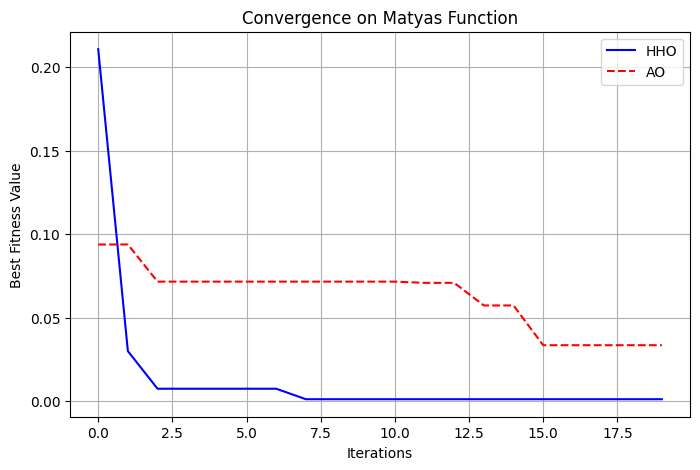

In [ ]:
# Matyas Function
plot_convergence(hho_convergence_matyas, ao_convergence_matyas, 'Convergence on Matyas Function')


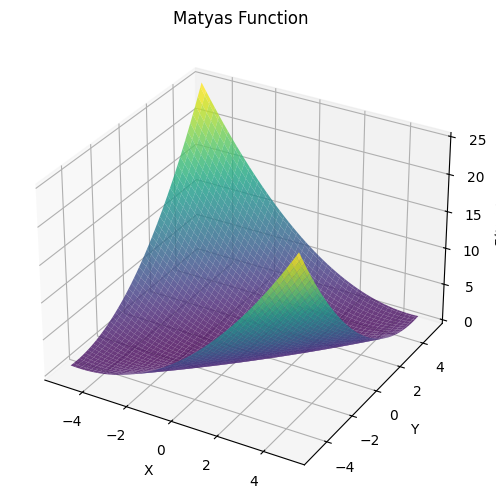

In [ ]:
plot_3d_function(matyas_function, 'Matyas Function')

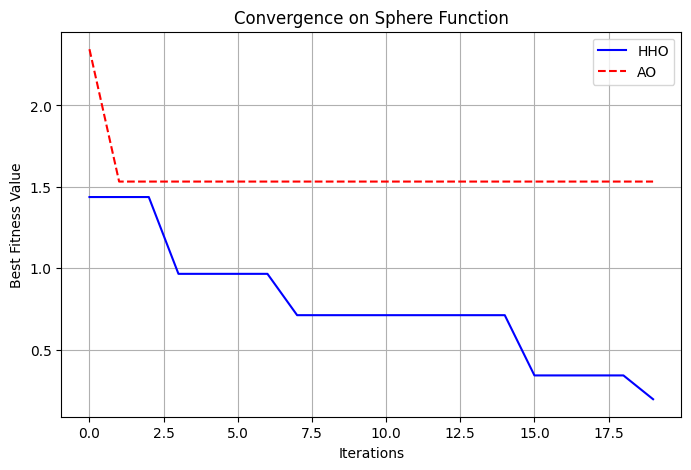

In [ ]:
# Sphere Function
plot_convergence(hho_convergence_sphere, ao_convergence_sphere, 'Convergence on Sphere Function')

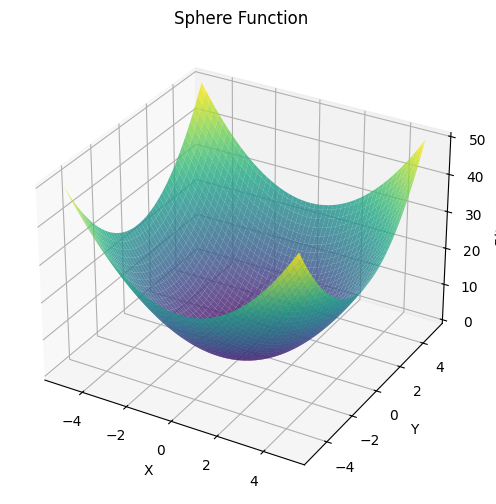

In [ ]:
plot_3d_function(sphere_function, 'Sphere Function')

In [ ]:
results = {
    'Function': ['Matyas', 'Sphere'],
    'HHO Best Score': [hho_best_score_matyas, hho_best_score_sphere],
    'AO Best Score': [ao_best_score_matyas, ao_best_score_sphere],
}

df = pd.DataFrame(results)
print("\n📊 **Comparison Table:**")
print(tabulate(df, headers='keys', tablefmt='grid'))



📊 **Comparison Table:**
+----+------------+------------------+-----------------+
|    | Function   |   HHO Best Score |   AO Best Score |
+====+============+==================+=================+
|  0 | Matyas     |       0.00100197 |       0.0333904 |
+----+------------+------------------+-----------------+
|  1 | Sphere     |       0.196034   |       1.53244   |
+----+------------+------------------+-----------------+


In [ ]:
if hho_best_score_matyas < ao_best_score_matyas:
    print("✅ HHO performed better on Matyas function.")
else:
    print("✅ AO performed better on Matyas function.")

if hho_best_score_sphere < ao_best_score_sphere:
    print("✅ HHO performed better on Sphere function.")
else:
    print("✅ AO performed better on Sphere function.")


✅ HHO performed better on Matyas function.
✅ HHO performed better on Sphere function.
